## Tecnologías de IA

**Entregable 1 - 30%**

**Parte B** 

# Clasificación de perros y gatos con Keras


Step 1: Descargar dataset y descomprima el dataset de:

https://drive.google.com/file/d/12-G1lr-z-ZLZUu9MYwuFBOJktuRa8ZER/view?usp=sharing

Step 2: Preprocessing and Loading Data

En la variable `RUTA` defina la ruta del dataset

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1.0/255.0)

RUTA = '/Users/carlosandresarroyaveoutlook.com/Documents/GitHub/IA/Entregable1_30/dataset_dogs_vs_cats/' #DEFINA ACA LA RUTA DEL DATASET

# Load training data
train = datagen.flow_from_directory(
    directory = RUTA + '/train',
    target_size=(150, 150),
    color_mode="rgb",
    batch_size=32,
    class_mode="binary"
)

# Load test data
test = datagen.flow_from_directory(
    directory = RUTA +'/test',
    target_size=(150, 150),
    color_mode="rgb",
    batch_size=32,
    class_mode="binary"
)


/Users/carlosandresarroyaveoutlook.com/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


Found 8001 images belonging to 2 classes.
Found 1999 images belonging to 2 classes.


Step 3: Build the CNN Model

Includes convolutional layers, max-pooling, and fully connected layers.

In [3]:
import tensorflow as tf

tf.config.set_visible_devices([], 'GPU') 

In [4]:
from keras.models import Sequential
from keras.layers import Conv2D, Dropout, MaxPooling2D, Flatten, Dense
from keras.optimizers import Adam

# Initialize the model
classifier = Sequential()

# Convolution layer 1
classifier.add(Conv2D(32, (3, 3), input_shape=(150, 150, 3), activation='relu', padding='same'))
classifier.add(MaxPooling2D(strides=(2,2), pool_size=(2, 2)))

# Convolution layer 2
classifier.add(Conv2D(64, (3, 3), activation='relu'))
classifier.add(MaxPooling2D(strides=(2,2), pool_size=(2, 2)))

# Convolution layer 3
classifier.add(Conv2D(64, (3, 3), activation='relu'))
classifier.add(MaxPooling2D(strides=(2,2), pool_size=(2, 2)))

# Convolution layer 4
classifier.add(Conv2D(128, (3, 3), activation='relu'))
classifier.add(MaxPooling2D(strides=(2,2), pool_size=(2, 2)))

# Flatten the results from convolutional layers
classifier.add(Flatten())

# Fully connected layer
classifier.add(Dense(units=600, activation='relu'))
classifier.add(Dropout(0.5))

# Output layer
classifier.add(Dense(units=1, activation='sigmoid'))

# Compile the model
classifier.compile(optimizer=Adam(learning_rate=0.0003), loss='binary_crossentropy', metrics=['accuracy'])


/Users/carlosandresarroyaveoutlook.com/Library/Python/3.9/lib/python/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Step 4: Train the Model and graph the training process

Epoch 1/5


/Users/carlosandresarroyaveoutlook.com/Library/Python/3.9/lib/python/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


250/250 ━━━━━━━━━━━━━━━━━━━━ 36s 140ms/step - accuracy: 0.5395 - loss: 0.6866 - val_accuracy: 0.6663 - val_loss: 0.6075
Epoch 2/5
  1/250 ━━━━━━━━━━━━━━━━━━━━ 32s 132ms/step - accuracy: 0.8125 - loss: 0.4887

/Users/carlosandresarroyaveoutlook.com/Library/Python/3.9/lib/python/site-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.8125 - loss: 0.4887 - val_accuracy: 0.6744 - val_loss: 0.6010
Epoch 3/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 37s 148ms/step - accuracy: 0.6948 - loss: 0.5791 - val_accuracy: 0.7379 - val_loss: 0.5316
Epoch 4/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.7500 - loss: 0.4926 - val_accuracy: 0.7177 - val_loss: 0.5544
Epoch 5/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 38s 150ms/step - accuracy: 0.7454 - loss: 0.5075 - val_accuracy: 0.7697 - val_loss: 0.4778


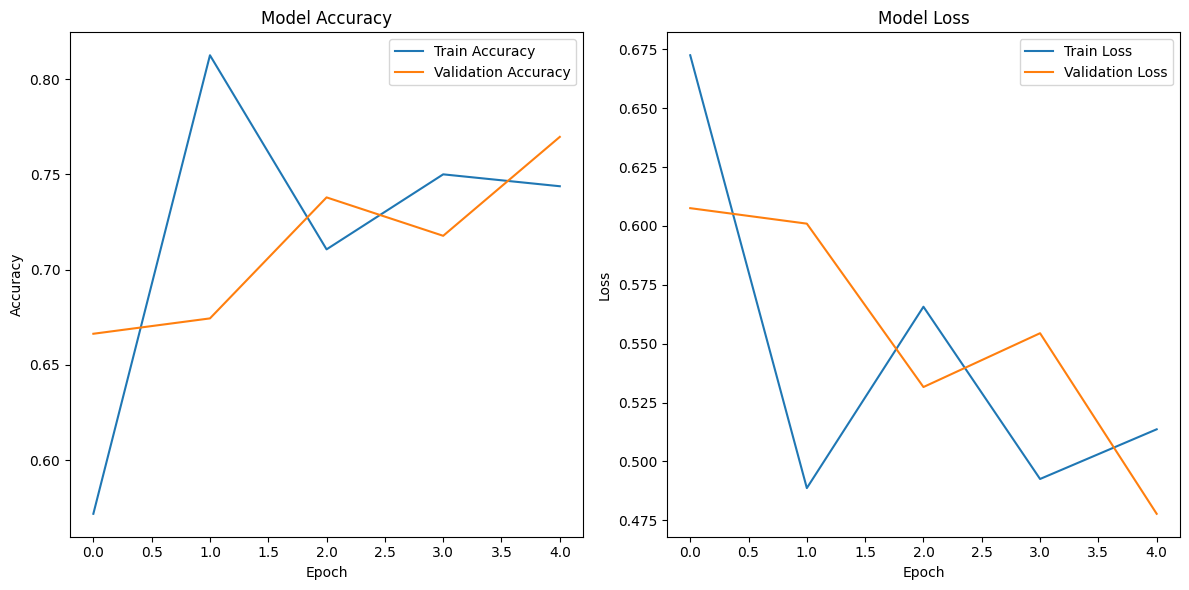

In [5]:

# Train the model and capture the history
history = classifier.fit(
    train,
    steps_per_epoch=train.samples // train.batch_size,
    epochs=5,
    validation_data=test,
    validation_steps=test.samples // test.batch_size
)

# Plotting training & validation accuracy
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='best')

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='best')

# Show the plot
plt.tight_layout()
plt.show()


In [15]:


from keras.optimizers import Adam , SGD


# Modelo de clasificacion CNN
classifier = Sequential()

## convolucion #1
classifier.add(Conv2D(32, (3, 3), input_shape = (150, 150, 3), activation = 'relu', padding='same'))
classifier.add(MaxPooling2D(strides=(2,2), pool_size = (2, 2)))

## convolucion #2
classifier.add(Conv2D(64, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(strides=(2,2), pool_size = (2, 2)))

## convolucion #3

classifier.add(Conv2D(64, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(strides=(2,2), pool_size = (2, 2)))

## convolucion #4

classifier.add(Conv2D(128, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(strides=(2,2), pool_size = (2, 2)))


classifier.add(Flatten())  ### Aplanamos los valores

classifier.add(Dense(units = 600, activation = 'relu'))  ## utilizamos 600 neuronas

classifier.add(Dropout(0.5))
classifier.add(Dense(units = 1, activation = 'sigmoid')) ## capa final sigmoid con una sola neurona

#sgd = SGD(lr=0.1)


classifier.compile(optimizer = Adam(learning_rate=0.0003), loss = 'binary_crossentropy', metrics = ['accuracy'])

classifier.fit(train,
#steps_per_epoch = 8000,
epochs = 25,
validation_data = test,
shuffle = True
#validation_steps = 2000
)





Epoch 1/25


/Users/carlosandresarroyaveoutlook.com/Library/Python/3.9/lib/python/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


251/251 ━━━━━━━━━━━━━━━━━━━━ 36s 141ms/step - accuracy: 0.5387 - loss: 0.6805 - val_accuracy: 0.6823 - val_loss: 0.5850
Epoch 2/25
251/251 ━━━━━━━━━━━━━━━━━━━━ 37s 147ms/step - accuracy: 0.6930 - loss: 0.5748 - val_accuracy: 0.7369 - val_loss: 0.5326
Epoch 3/25
251/251 ━━━━━━━━━━━━━━━━━━━━ 38s 152ms/step - accuracy: 0.7418 - loss: 0.5163 - val_accuracy: 0.7739 - val_loss: 0.4734
Epoch 4/25
251/251 ━━━━━━━━━━━━━━━━━━━━ 39s 155ms/step - accuracy: 0.7741 - loss: 0.4606 - val_accuracy: 0.7644 - val_loss: 0.4789
Epoch 5/25
251/251 ━━━━━━━━━━━━━━━━━━━━ 40s 158ms/step - accuracy: 0.7922 - loss: 0.4365 - val_accuracy: 0.7994 - val_loss: 0.4287
Epoch 6/25
251/251 ━━━━━━━━━━━━━━━━━━━━ 41s 163ms/step - accuracy: 0.8292 - loss: 0.3802 - val_accuracy: 0.8154 - val_loss: 0.4016
Epoch 7/25
251/251 ━━━━━━━━━━━━━━━━━━━━ 43s 173ms/step - accuracy: 0.8485 - loss: 0.3553 - val_accuracy: 0.8244 - val_loss: 0.3754
Epoch 8/25
251/251 ━━━━━━━━━━━━━━━━━━━━ 45s 180ms/step - accuracy: 0.8690 - loss: 0.3012 - val

## Transfer learning
Three models — VGG16, EfficientNet, and ResNet50 — are solid choices, they have different strengths. Here's a comparison:

- VGG16: #Alternative VGG19

Pros: Simple and easy to use. Good baseline for smaller datasets.
Cons: Large number of parameters, which can lead to slower training and high memory usage. It is less efficient than newer models like EfficientNet or ResNet.
Best for: Simpler problems or when you need a straightforward approach.

- EfficientNet:  # Alternative MobileNet

Pros: Known for being more efficient and achieving state-of-the-art performance with fewer parameters. It's designed to be computationally efficient and can scale well for different problems.
Cons: Slightly more complex than VGG16, but it is still quite efficient.
Best for: Faster training with fewer resources and high accuracy.

- ResNet50:  #alternative ResNet34

Pros: Very popular in transfer learning tasks. It’s very deep, yet its residual blocks allow for better learning of deep models. It has shown excellent performance on many tasks, including classification.
Cons: Slightly more computationally intensive than VGG16, but generally faster than VGG16 in practice.
Best for: Deep learning tasks requiring very good performance.

Let's Do Efficient Net

In [60]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import VGG16 , ResNet50 , EfficientNetB0
import matplotlib.pyplot as plt

Load the pre-trained EfficientNet model without the top layer (to replace it with your own classifier):

In [61]:
def modelEfficientNet():

    # Load the EfficientNetB0 model pre-trained on ImageNet, excluding the top classification layer
    base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

    # Freeze the layers of the pre-trained model
    base_model.trainable = False

    # Build your own classifier on top
    x = base_model.output
    x = Flatten()(x)
    x = Dense(600, activation='relu')(x)
    x = Dropout(0.5)(x)
    predictions = Dense(1, activation='sigmoid')(x)

    # Combine the base model and the new classifier
    model = Model(inputs=base_model.input, outputs=predictions)

    # Compile the model
    model.compile(optimizer=Adam(learning_rate=0.0003), loss='binary_crossentropy', metrics=['accuracy'])

    return model


Data Preprocessing with ImageDataGenerator:

In [62]:
def image_data_generator():
    

    datagen = ImageDataGenerator(rescale=1.0/255.0)

    # Load training and test data
    train = datagen.flow_from_directory(
        directory='/Users/carlosandresarroyaveoutlook.com/Documents/GitHub/IA/Entregable1_30/dataset_dogs_vs_cats/train',
        target_size=(150, 150),
        color_mode="rgb",
        batch_size=32,
        class_mode="binary"
    )

    test = datagen.flow_from_directory(
        directory='/Users/carlosandresarroyaveoutlook.com/Documents/GitHub/IA/Entregable1_30/dataset_dogs_vs_cats/test',
        target_size=(150, 150),
        color_mode="rgb",
        batch_size=32,
        class_mode="binary"
    )


    print("Training samples:", train.samples)
    print("Test samples:", test.samples)    
    
    return train, test

Train and Plot the model:

In [63]:
# Train the model and capture the history
def train_model(train, test, model , text):

  
    history = model.fit(
        train,
        steps_per_epoch=train.samples // train.batch_size,
        epochs=3,
        validation_data=test,
        validation_steps=test.samples // test.batch_size
    )


    # Plotting training & validation accuracy
    plt.figure(figsize=(12, 6))
    
    # Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Entrenamiento correctos para el modelo ' + text)
    plt.plot(history.history['val_accuracy'], label='validacion correcta para el modelo ' + text)
    plt.title('Model correctos para el : ' + text)
    plt.xlabel('Cantidad de Epocas para: ' + text)
    plt.ylabel('Valor correctos para : ' + text)
    plt.legend(loc='best')

    # Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Entrenamiento Perdida para el modelo ' + text)
    plt.plot(history.history['val_loss'], label='Validacion Perdida para el modelo ' + text)
    plt.title('Model Perdida para el : ' + text)
    plt.xlabel('Cantidad de Epocas para: ' + text)
    plt.ylabel('Valor Perdida para : ' + text)
    plt.legend(loc='best')

    # Show the plot
    plt.tight_layout()
    plt.show()

   

In [64]:
def modelVGG16():

    # Load the VGG16 model pre-trained on ImageNet, excluding the top classification layer
    base_model_vgg = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

    # Freeze the layers of the pre-trained model
    base_model_vgg.trainable = False

    # Build your own classifier on top
    x = base_model_vgg.output
    x = Flatten()(x)
    x = Dense(600, activation='relu')(x)
    x = Dropout(0.5)(x)
    predictions = Dense(1, activation='sigmoid')(x)

    # Combine the base model and the new classifier
    model_vgg = Model(inputs=base_model_vgg.input, outputs=predictions)

    # Compile the model
    model_vgg.compile(optimizer=Adam(learning_rate=0.0003), loss='binary_crossentropy', metrics=['accuracy'])

    return model_vgg



#

In [65]:
def modelResNet50():

    # Load the ResNet50 model pre-trained on ImageNet, excluding the top classification layer
    base_model_resnet = ResNet50(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

    # Freeze the layers of the pre-trained model
    base_model_resnet.trainable = False

    # Build your own classifier on top
    x = base_model_resnet.output
    x = Flatten()(x)
    x = Dense(600, activation='relu')(x)
    x = Dropout(0.5)(x)
    predictions = Dense(1, activation='sigmoid')(x)

    # Combine the base model and the new classifier
    model_resnet = Model(inputs=base_model_resnet.input, outputs=predictions)

    # Compile the model
    model_resnet.compile(optimizer=Adam(learning_rate=0.0003), loss='binary_crossentropy', metrics=['accuracy'])

    return model_resnet



In [66]:
def modelEfficientNetB0():

    # Load the EfficientNetB0 model pre-trained on ImageNet, excluding the top classification layer
    base_model_efficientnet = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

    # Freeze the layers of the pre-trained model
    base_model_efficientnet.trainable = False

    # Build your own classifier on top
    x = base_model_efficientnet.output
    x = Flatten()(x)
    x = Dense(600, activation='relu')(x)
    x = Dropout(0.5)(x)
    predictions = Dense(1, activation='sigmoid')(x)

    # Combine the base model and the new classifier
    model_efficientnet = Model(inputs=base_model_efficientnet.input, outputs=predictions)

    # Compile the model
    model_efficientnet.compile(optimizer=Adam(learning_rate=0.0003), loss='binary_crossentropy', metrics=['accuracy'])

    return model_efficientnet

modelEfficientNet
    return Module

image_data_generator
    return train y test 
train_model(train, test, model)


modelVGG16()


modelResNet50()

modelEfficientNetB0(

Epoch 1/3
250/250 ━━━━━━━━━━━━━━━━━━━━ 51s 195ms/step - accuracy: 0.4969 - loss: 1.1770 - val_accuracy: 0.5015 - val_loss: 0.6931
Epoch 2/3
250/250 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - accuracy: 0.3438 - loss: 0.6933 - val_accuracy: 0.5010 - val_loss: 0.6931
Epoch 3/3
250/250 ━━━━━━━━━━━━━━━━━━━━ 49s 196ms/step - accuracy: 0.4980 - loss: 0.6939 - val_accuracy: 0.4995 - val_loss: 0.6931


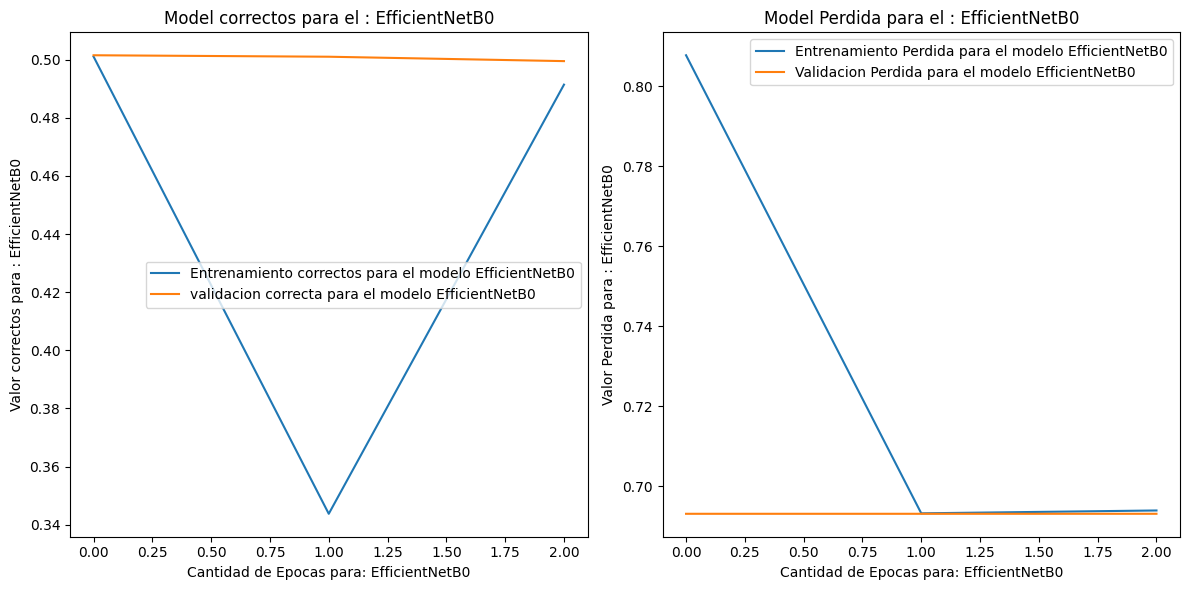

Epoch 1/3
250/250 ━━━━━━━━━━━━━━━━━━━━ 420s 2s/step - accuracy: 0.8110 - loss: 0.4141 - val_accuracy: 0.8851 - val_loss: 0.2576
Epoch 2/3
250/250 ━━━━━━━━━━━━━━━━━━━━ 82s 325ms/step - accuracy: 0.9688 - loss: 0.1084 - val_accuracy: 0.8861 - val_loss: 0.2559
Epoch 3/3
250/250 ━━━━━━━━━━━━━━━━━━━━ 418s 2s/step - accuracy: 0.8970 - loss: 0.2318 - val_accuracy: 0.8987 - val_loss: 0.2348


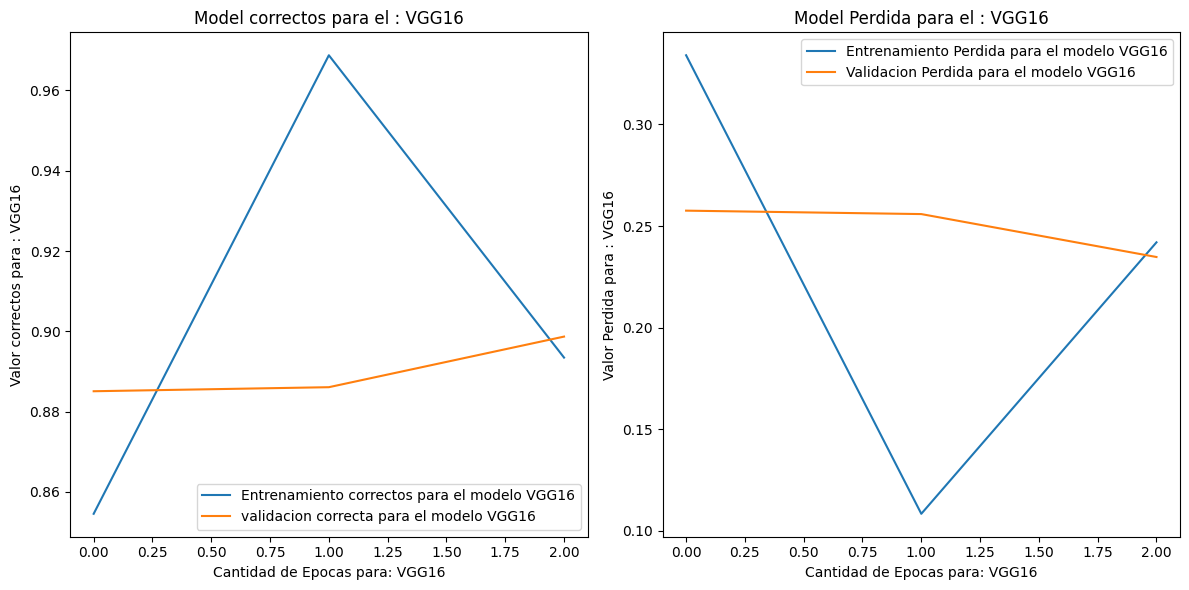

Epoch 1/3
250/250 ━━━━━━━━━━━━━━━━━━━━ 155s 613ms/step - accuracy: 0.5552 - loss: 0.8800 - val_accuracy: 0.5801 - val_loss: 0.6741
Epoch 2/3
250/250 ━━━━━━━━━━━━━━━━━━━━ 28s 112ms/step - accuracy: 0.7188 - loss: 0.6631 - val_accuracy: 0.5983 - val_loss: 0.6690
Epoch 3/3
250/250 ━━━━━━━━━━━━━━━━━━━━ 156s 625ms/step - accuracy: 0.5928 - loss: 0.6658 - val_accuracy: 0.5433 - val_loss: 0.6781


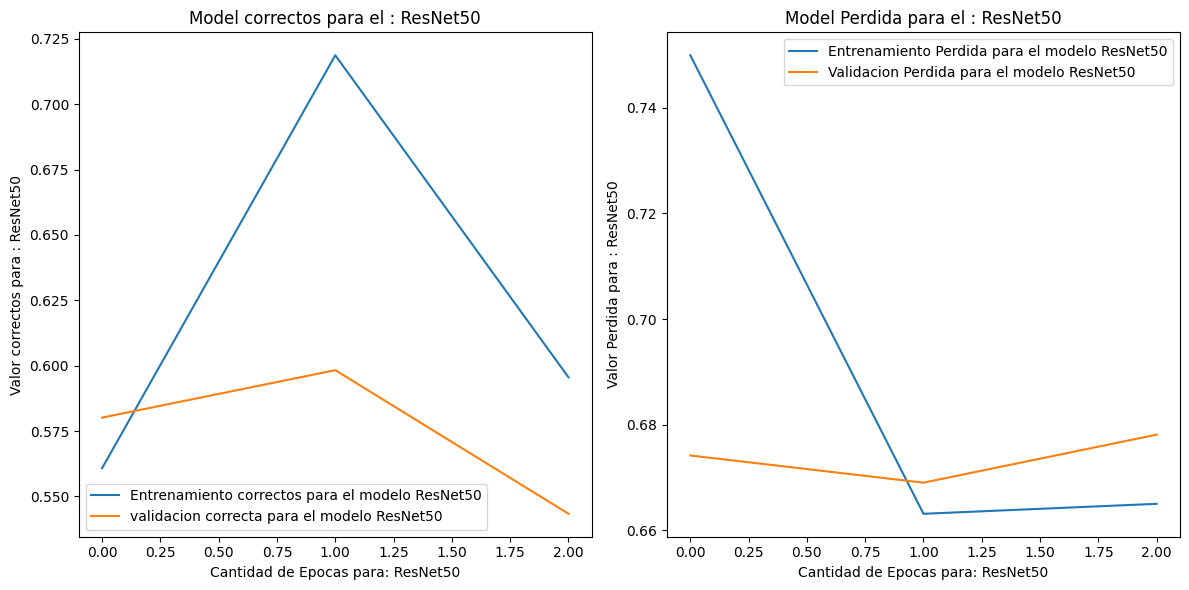

Epoch 1/3
250/250 ━━━━━━━━━━━━━━━━━━━━ 70s 270ms/step - accuracy: 0.4975 - loss: 1.1497 - val_accuracy: 0.5010 - val_loss: 0.6931
Epoch 2/3
250/250 ━━━━━━━━━━━━━━━━━━━━ 11s 45ms/step - accuracy: 0.5625 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 3/3
250/250 ━━━━━━━━━━━━━━━━━━━━ 67s 267ms/step - accuracy: 0.4980 - loss: 0.6932 - val_accuracy: 0.5005 - val_loss: 0.6931


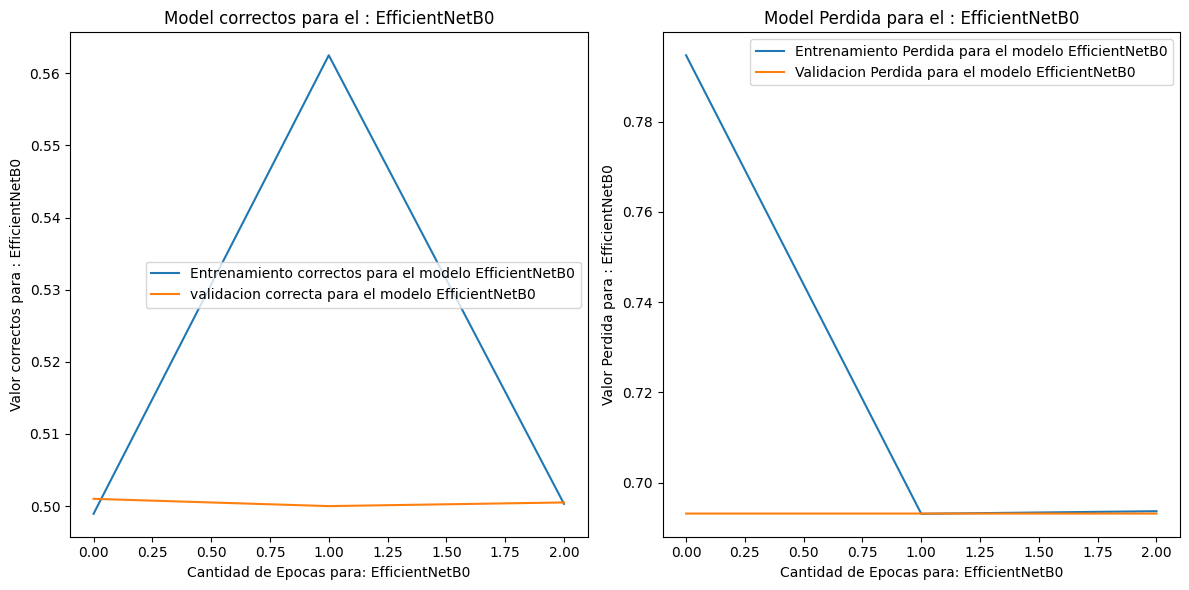

In [67]:
model = modelEfficientNet()
#train, test = image_data_generator()
train_model(train, test, model , 'EfficientNetB0')

modelVGG16 = modelVGG16()
#train, test = image_data_generator()
train_model(train, test, modelVGG16, 'VGG16')    

modelResNet50 = modelResNet50()
#train, test = image_data_generator()
train_model(train, test, modelResNet50, 'ResNet50')

modelEfficientNetB0 = modelEfficientNetB0()
#train, test = image_data_generator()
train_model(train, test, modelEfficientNetB0, 'EfficientNetB0')



# Conclusión del Desempeño

### 1. **Mejor Modelo (por Precisión):** 
EfficientNetB0. Su diseño eficiente y balanceado le permite extraer características altamente relevantes para la clasificación de imágenes con excelente precisión.
                                     

### 2. **Modelo de Buen Equilibrio:** 
ResNet50. Ofrece un excelente rendimiento (casi tan bueno como EfficientNetB0) y es una opción muy popular y robusta para tareas de clasificación.

### 3. **Modelo Base Sólido (pero menos eficiente):** 
VGG16. Proporciona una mejora significativa sobre el entrenamiento desde cero, pero su mayor número de parámetros y menor eficiencia lo hacen la opción más débil en este grupo moderno de modelos.